<a href="https://colab.research.google.com/github/kirill07112008/123/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')



In [27]:
df = pd.read_csv('sample1.csv')
df['ds'] = pd.to_datetime(df['ds'], format='%d.%m.%Y')
df['y'] = df['y'].str.replace(',', '.').astype(float)
# df['y'] = pd.to_numeric(df['y'], errors='coerce')

df.head()

,ds,y
0,2025-05-01,81.4933
1,2025-04-30,81.5616
2,2025-04-29,82.5467
3,2025-04-26,82.6549
4,2025-04-25,82.8559


In [28]:
split_date = "15.04.2025"
split_date = pd.to_datetime(split_date, format='%d.%m.%Y')
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [29]:
model = fbp.Prophet()

model.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8fpzcl45/625pqt3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8fpzcl45/mz3anvqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42683', 'data', 'file=/tmp/tmp8fpzcl45/625pqt3d.json', 'init=/tmp/tmp8fpzcl45/mz3anvqe.json', 'output', 'file=/tmp/tmp8fpzcl45/prophet_modelcitftbs1/prophet_model-20250511051108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [30]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7,2025-04-25,-114.332352,62.624082,84.266278,-124.778898,-103.136701,187.402980,187.402980,187.402980,187.402980,187.402980,187.402980,0.0,0.0,0.0,73.070628
8,2025-04-26,-115.185573,59.652821,85.771305,-127.591474,-101.472990,187.244295,187.244295,187.244295,187.244295,187.244295,187.244295,0.0,0.0,0.0,72.058722
9,2025-04-29,-117.745236,56.380438,86.990978,-132.186600,-101.576060,188.567038,188.567038,188.567038,188.567038,188.567038,188.567038,0.0,0.0,0.0,70.821802
10,2025-04-30,-118.598457,52.250137,87.939498,-135.395634,-99.706273,187.645771,187.645771,187.645771,187.645771,187.645771,187.645771,0.0,0.0,0.0,69.047314
11,2025-05-01,-119.451678,49.084773,89.750460,-138.541400,-97.875712,187.626172,187.626172,187.626172,187.626172,187.626172,187.626172,0.0,0.0,0.0,68.174494


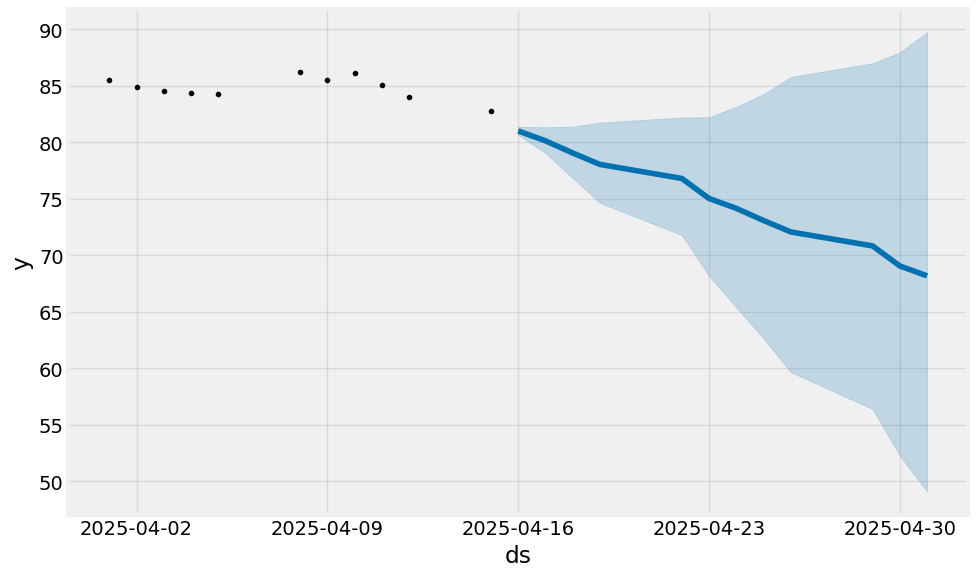

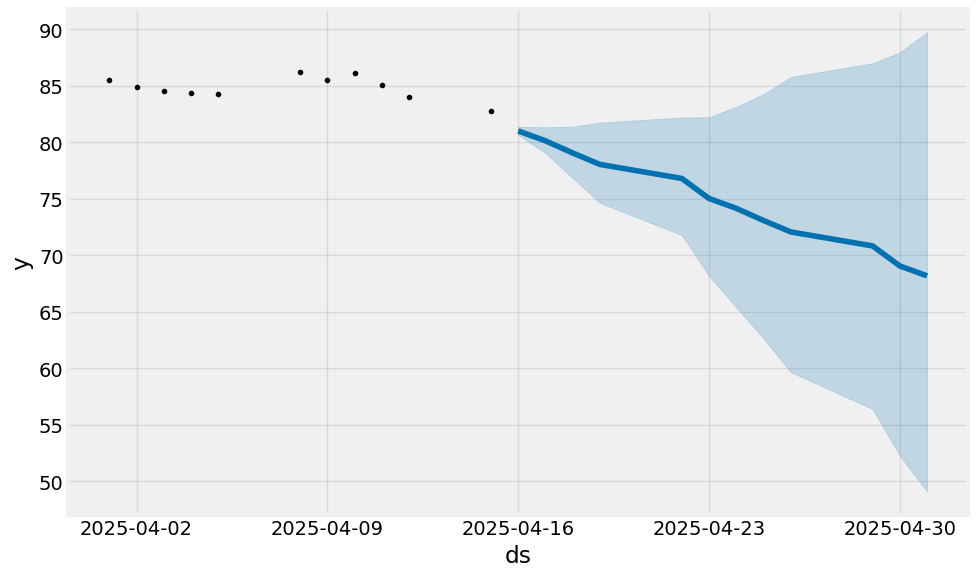

In [31]:
model.plot(forecast)

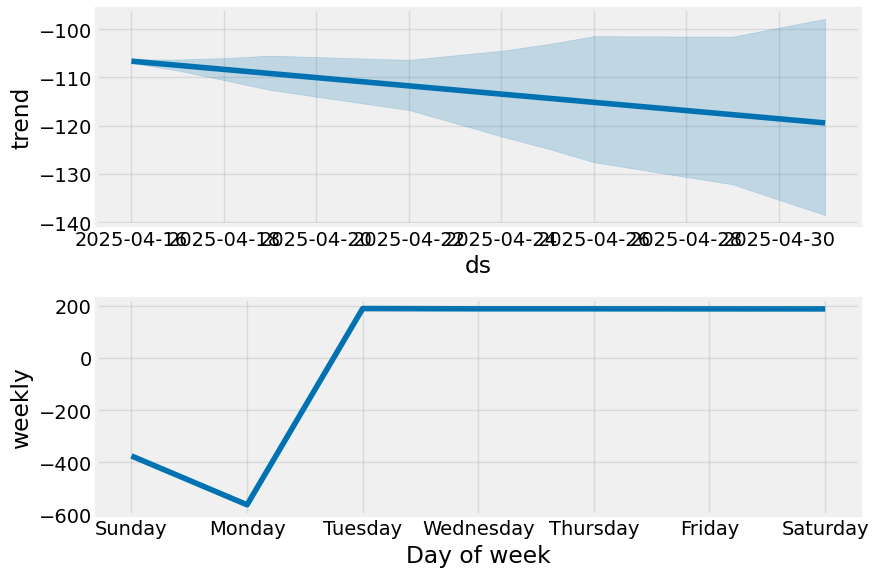

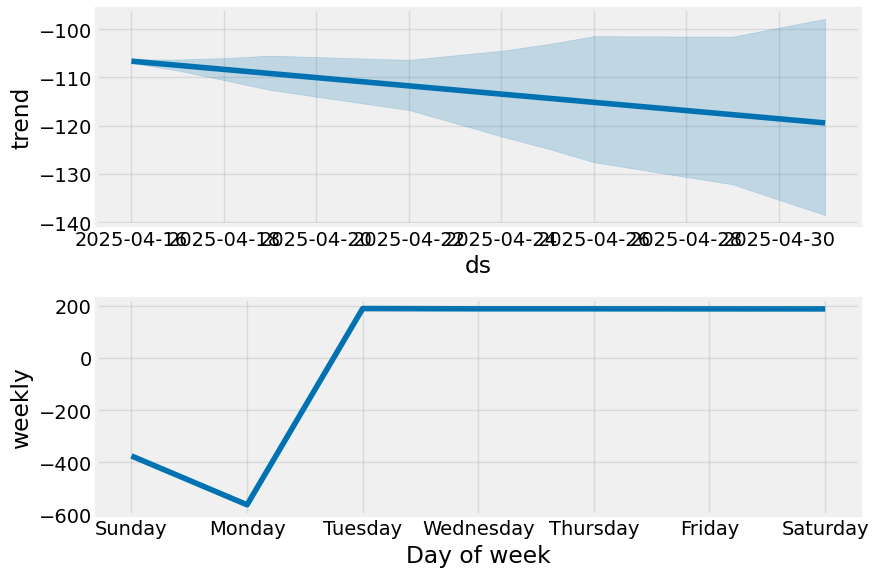

In [33]:

model.plot_components(forecast)

In [40]:
print("Средняя квадратическая ошибка (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Средняя абсолютная ошибка (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Средняя квадратическая ошибка (MSE): 69.16878832266171
Средняя абсолютная ошибка (MAE): 7.201979466778248


In [41]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Средняя абсолютная ошибка в % (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Средняя абсолютная ошибка в % (MAPE):  8.77965462469473
